In [2]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/raw/train.csv')

# Display the first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ticket = data['Ticket'].copy()

In [4]:
# Basic statistics for the 'Fare' column
ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [5]:
# remove rows with Fare = 0, as it may not be useful for analysis
data = data[data['Fare'] != 0].copy()


In [6]:
data['Ticket'].value_counts()

Ticket
347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
2693        1
PC 17612    1
349233      1
349236      1
370376      1
Name: count, Length: 671, dtype: int64

In [7]:
# extract Deck from Cabin or Ticket
data['Deck'] = data['Cabin'].astype(str).str[0]
data['Deck'] = data['Deck'].replace("n", pd.NA)  # from "nan" string
data['Deck'] = data['Deck'].fillna('Unknown')
data['Deck'].value_counts()

Deck
Unknown    675
C           59
B           45
D           33
E           32
A           14
F           13
G            4
T            1
Name: count, dtype: int64

In [8]:
data['Ticket_prefix'] = data['Ticket'].astype(str).str.replace(r'\d+', '', regex=True).str.replace('.', '', regex=False).str.strip()
data['Ticket_prefix'] = data['Ticket_prefix'].replace('', 'NUMBER')
data['Ticket_prefix'].value_counts()

Ticket_prefix
NUMBER         650
PC              60
CA              41
A/              25
STON/O          18
SOTON/OQ        15
W/C             10
SC/PARIS         7
C                5
FCC              5
SOC              5
SC/Paris         4
SO/PP            3
A                3
PP               3
SW/PP            2
SC/AH            2
SOTON/O          2
WE/P             2
P/PP             2
FC               1
SC/AH Basle      1
A/S              1
SP               1
SC               1
SCO/W            1
Fa               1
SOP              1
WEP              1
SC/A             1
SO/C             1
CA/SOTON         1
Name: count, dtype: int64

In [9]:
# Ticket group by Fare and Embarked
ticket_grouped = data.groupby(['Ticket_prefix', 'Embarked','Deck'])['Fare'].mean().reset_index()
ticket_grouped

,Ticket_prefix,Embarked,Deck,Fare
0,A,S,Unknown,8.050000
1,A/,Q,Unknown,7.733300
2,A/,S,Unknown,10.389583
3,A/S,S,Unknown,8.050000
4,C,S,Unknown,10.123340
...,...,...,...,...
62,STON/O,S,Unknown,8.672222
63,SW/PP,S,Unknown,10.500000
64,W/C,S,Unknown,22.345000
65,WE/P,S,B,71.000000


In [10]:
# pivot table on ticket_grouped to count unique tickets per Embarked and Deck
ticket_pivot = ticket_grouped.pivot_table(index=['Ticket_prefix','Embarked'], columns='Deck',
                                             values='Fare', aggfunc='mean', fill_value=0)
ticket_pivot


Deck                           A           B           C          D  \
Ticket_prefix Embarked                                                
A             S          0.00000    0.000000    0.000000   0.000000   
A/            Q          0.00000    0.000000    0.000000   0.000000   
              S          0.00000    0.000000    0.000000   0.000000   
A/S           S          0.00000    0.000000    0.000000   0.000000   
C             S          0.00000    0.000000    0.000000   0.000000   
CA            S          0.00000    0.000000    0.000000   0.000000   
CA/SOTON      S          0.00000    0.000000    0.000000   0.000000   
FC            S          0.00000   52.000000    0.000000   0.000000   
FCC           S          0.00000    0.000000    0.000000   0.000000   
Fa            S          0.00000    0.000000    0.000000   0.000000   
NUMBER        C         35.38416   60.999556   88.738627  92.557157   
              Q          0.00000    0.000000   90.000000   0.000000   
              S         45.89305   98.309028   91.641803  46.397805   
P/PP          C          0.00000    0.000000    0.000000   0.000000   
PC            C         45.79170  204.785569  109.410830  73.386475   
              S         50.49580    0.000000  163.560000  39.400000   
PP            S          0.00000    0.000000    0.000000   0.000000   
SC            C          0.00000    0.000000    0.000000   0.000000   
SC/A          S          0.00000    0.000000    0.000000   0.000000   
SC/AH         S          0.00000    0.000000    0.000000   0.000000   
SC/AH Basle   C          0.00000    0.000000    0.000000  13.791700   
SC/PARIS      C          0.00000    0.000000    0.000000   0.000000   
SC/Paris      C          0.00000    0.000000    0.000000  12.875000   
SCO/W         S          0.00000    0.000000    0.000000   0.000000   
SO/C          S          0.00000    0.000000    0.000000   0.000000   
SO/PP         S          0.00000    0.000000    0.000000   0.000000   
SOC           S          0.00000    0.000000    0.000000   0.000000   
SOP           S          0.00000    0.000000    0.000000   0.000000   
SOTON/O       S          0.00000    0.000000    0.000000   0.000000   
SOTON/OQ      S          0.00000    0.000000    0.000000   0.000000   
SP            S          0.00000    0.000000    0.000000   0.000000   
STON/O        S          0.00000    0.000000    0.000000   0.000000   
SW/PP         S          0.00000    0.000000    0.000000   0.000000   
W/C           S          0.00000    0.000000    0.000000   0.000000   
WE/P          S          0.00000   71.000000    0.000000   0.000000   
WEP           S          0.00000    0.000000    0.000000   0.000000   

Deck                             E          F        G     T     Unknown  
Ticket_prefix Embarked                                                    
A             S           0.000000   0.000000   0.0000   0.0    8.050000  
A/            Q           0.000000   0.000000   0.0000   0.0    7.733300  
              S           0.000000   0.000000   0.0000   0.0   10.389583  
A/S           S           0.000000   0.000000   0.0000   0.0    8.050000  
C             S           0.000000   0.000000   0.0000   0.0   10.123340  
CA            S           0.000000  10.500000   0.0000   0.0   32.042308  
CA/SOTON      S           0.000000   0.000000   0.0000   0.0   10.500000  
FC            S           0.000000   0.000000   0.0000   0.0    0.000000  
FCC           S           0.000000   0.000000   0.0000   0.0   22.050000  
Fa            S           0.000000   0.000000   0.0000   0.0    7.312500  
NUMBER        C         108.147233  22.358300   0.0000   0.0   13.886565  
              Q          12.350000   7.750000   0.0000   0.0   11.311403  
              S          42.684211  21.327778  10.4625  35.5   17.359904  
P/PP          C           0.000000   0.000000   0.0000   0.0   24.000000  
PC            C          70.043750   0.000000   0.0000   0.0  115.808047  
              S          2

In [11]:
# extract ticket with Fare = 0
ticket_zero_fare = data[data['Fare'] == 0]
ticket_zero_fare.shape


(0, 14)

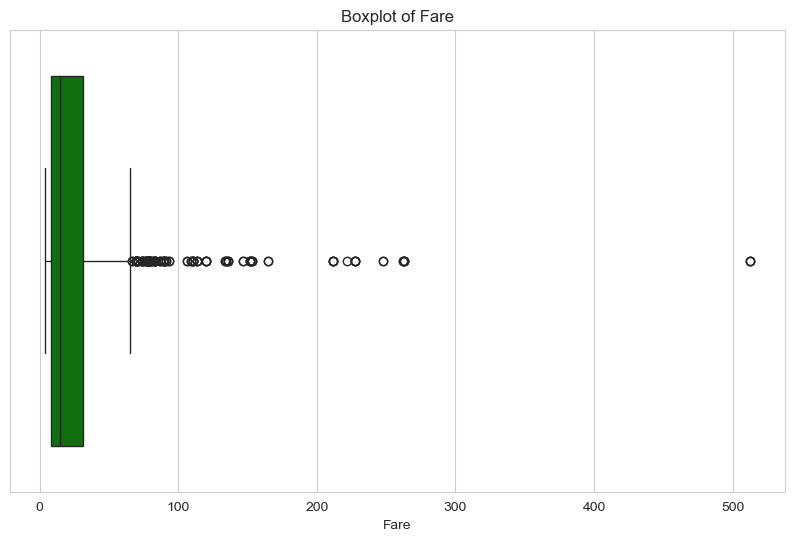

In [12]:
# Boxplot for 'Fare'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Fare'], color='green')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

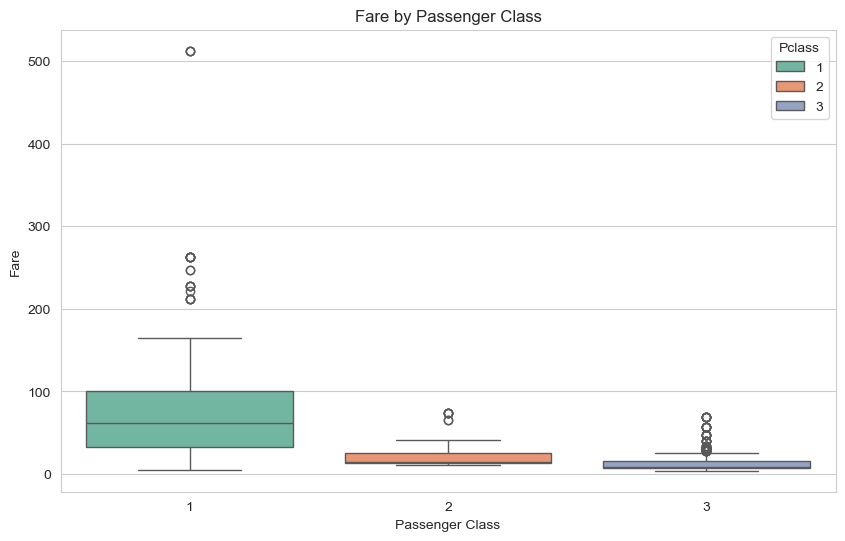

In [13]:
# Analyze 'Fare' by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Pclass'], y=data['Fare'],hue= data['Pclass'], palette='Set2')
plt.title('Boxplot of Pclass')
plt.xlabel('Pclass')
plt.title('Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

In [16]:
import pandas as pd
import numpy as np
from collections import Counter

def fill_unknown_cabins_by_family(data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()

    # --- 0) ensure required columns & create Surname if needed ---
    required = ['Name', 'Embarked', 'Pclass', 'Ticket', 'Cabin']
    missing = [c for c in required if c not in df.columns]
    if missing:
        raise KeyError(f"Missing columns: {missing}. Available: {list(df.columns)}")

    if 'Surname' not in df.columns:
        df['Surname'] = df['Name'].str.split(',').str[0].str.strip()

    # --- helpers ---
    def is_unknown(s: pd.Series) -> pd.Series:
        return s.isna() | s.astype(str).str.strip().str.lower().eq('unknown')

    def group_single_known(series: pd.Series):
        vals = [v for v in series.dropna().astype(str) if v.strip().lower() != 'unknown']
        uniq = pd.unique(vals)
        return uniq[0] if len(uniq) == 1 else np.nan

    def agg_for_display(s: pd.Series) -> str:
        vals = [v for v in s.dropna().astype(str) if v.strip().lower() != 'unknown']
        return 'Unknown' if not vals else ', '.join(pd.unique(vals))

    # --- 1) baseline fill on (Surname, Embarked, Pclass) ---
    keys = ['Surname', 'Embarked', 'Pclass']
    df['Cabin_orig'] = df['Cabin']

    clean = df['Cabin'].mask(is_unknown(df['Cabin']))
    fill_map = (
        df.assign(Cabin_clean=clean)
          .groupby(keys)['Cabin_clean']
          .agg(group_single_known)
          .rename('fill_cabin')
          .reset_index()
    )
    df = df.merge(fill_map, on=keys, how='left')

    mask = is_unknown(df['Cabin']) & df['fill_cabin'].notna()
    df.loc[mask, 'Cabin'] = df.loc[mask, 'fill_cabin']

    # Final filled column
    df['Cabin_Filled'] = df['Cabin'].fillna('Unknown')

    # --- 2) optional grouped view & diagnostics ---
    cabin_grouped = (
        df.groupby(keys)['Cabin_Filled']
          .agg(agg_for_display)
          .reset_index()
          .rename(columns={'Cabin_Filled': 'Cabin_Grouped_After'})
    )

    n_before = (~is_unknown(df['Cabin_orig'])).sum()
    n_after  = (~is_unknown(df['Cabin_Filled'])).sum()
    print(f"Known cabins before: {n_before} | after: {n_after} | filled: {n_after - n_before}")

    changed_rows = is_unknown(df['Cabin_orig']) & (~is_unknown(df['Cabin_Filled']))
    print(df.loc[changed_rows, ['PassengerId','Surname','Embarked','Pclass','Ticket','Cabin_orig','Cabin_Filled']].head(20))

    return df, cabin_grouped

# ---- USAGE ----
# data = your dataframe
df_filled, cabin_grouped_after = fill_unknown_cabins_by_family(data)


Known cabins before: 201 | after: 205 | filled: 4
     PassengerId Surname Embarked  Pclass Ticket Cabin_orig Cabin_Filled
525          534   Peter        C       3   2668        NaN        F E69
660          671   Brown        S       2  29750        NaN          F33
673          685   Brown        S       2  29750        NaN          F33
841          857    Wick        S       1  36928        NaN           C7


/var/folders/9p/3m7pzfnx10g1ldj4zkry7fbw0000gn/T/ipykernel_5034/2850590638.py:23: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  uniq = pd.unique(vals)
/var/folders/9p/3m7pzfnx10g1ldj4zkry7fbw0000gn/T/ipykernel_5034/2850590638.py:23: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  uniq = pd.unique(vals)
/var/folders/9p/3m7pzfnx10g1ldj4zkry7fbw0000gn/T/ipykernel_5034/2850590638.py:23: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  uniq = pd.unique(vals)
/var/folders/9p/3m7pzfnx10g1ldj4zkry7fbw0000gn/T/ipykernel_5034/2850590638.py:23: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
 